<a href="https://www.kaggle.com/code/omaraboelnaga/customer-segmentation-in-two-ways?scriptVersionId=198267238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score

In [2]:
f = pd.read_excel("/kaggle/input/customer-clustering/segmentation data legend.xlsx")
f

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of information about the ...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,ID,numerical,Integer,Shows a unique identificator of a customer.
4,NaN,NaN,NaN,NaN,NaN
5,NaN,Sex,categorical,"{0,1}",Biological sex (gender) of a customer. In this...
6,NaN,NaN,NaN,0,male
7,NaN,NaN,NaN,1,female
8,NaN,NaN,NaN,NaN,NaN
9,NaN,Marital status,categorical,"{0,1}",Marital status of a customer.


In [3]:
df= pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


<Axes: xlabel='Income', ylabel='Density'>

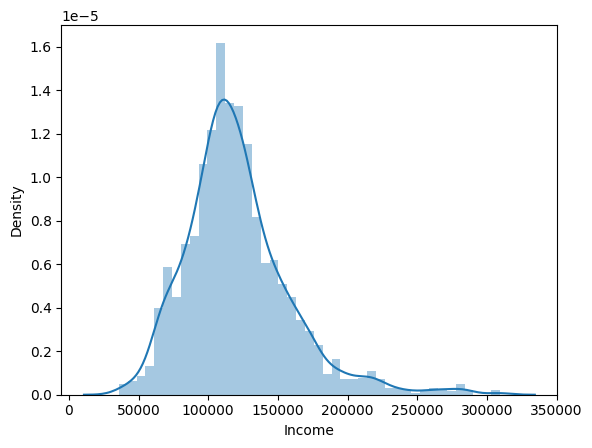

In [4]:
sns.distplot(df.Income)

In [5]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25) 
    q3 = df[col_name].quantile(0.75)  
    iqr = q3 - q1
    df_filtered = df[(df[col_name] >= q1 - 1.5 * iqr) & (df[col_name] <= q3 + 1.5 * iqr)]
    return df_filtered

df = remove_outliers(df, 'Income')

In [6]:
df = df.drop('ID' , axis =1)

In [7]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [8]:
df_2 = df[['Income', 'Age']]

In [9]:
df_2

,Income,Age
0,124670,67
1,150773,22
2,89210,49
3,171565,45
4,149031,53
...,...,...
1995,123525,47
1996,117744,27
1997,86400,31
1998,97968,24


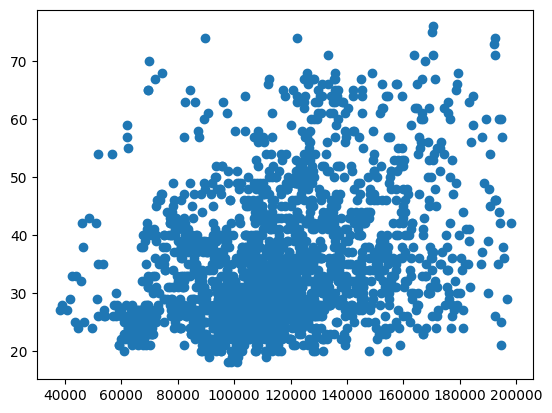

In [10]:
plt.scatter(df_2.Income,df_2.Age)

In [11]:
WCSS = []
silhouette=[]
clusters = range(1,10)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(df_2)
    WCSS.append(model.inertia_)
    label = model.predict(df_2)
    if (i > 1):
        silhouette.append(silhouette_score(df_2,label))

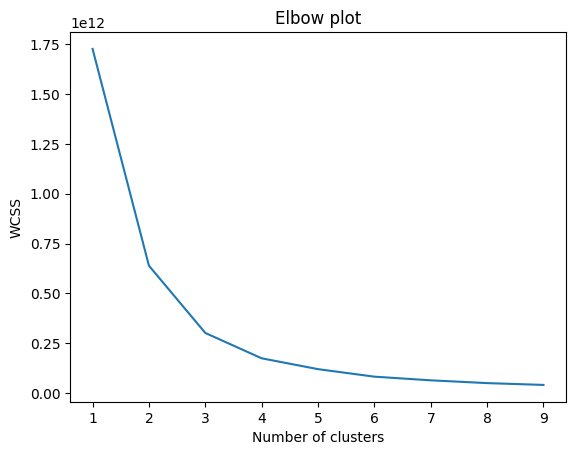

In [12]:
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow plot")
plt.plot(clusters , WCSS)

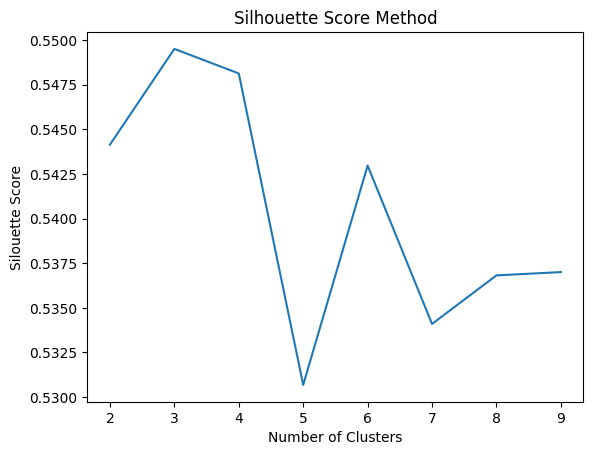

In [13]:
plt.plot(range(2,10),silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Silouette Score")
plt.title("Silhouette Score Method")
plt.show()

### 3 clusters is probably the most optimum number of clusters

In [14]:
df_2

,Income,Age
0,124670,67
1,150773,22
2,89210,49
3,171565,45
4,149031,53
...,...,...
1995,123525,47
1996,117744,27
1997,86400,31
1998,97968,24


In [15]:
model = KMeans(n_clusters = 3, init='k-means++',n_init=100)
y_predicted  = model.fit_predict(df_2)
y_predicted

array([1, 0, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
df_2['Group'] = y_predicted

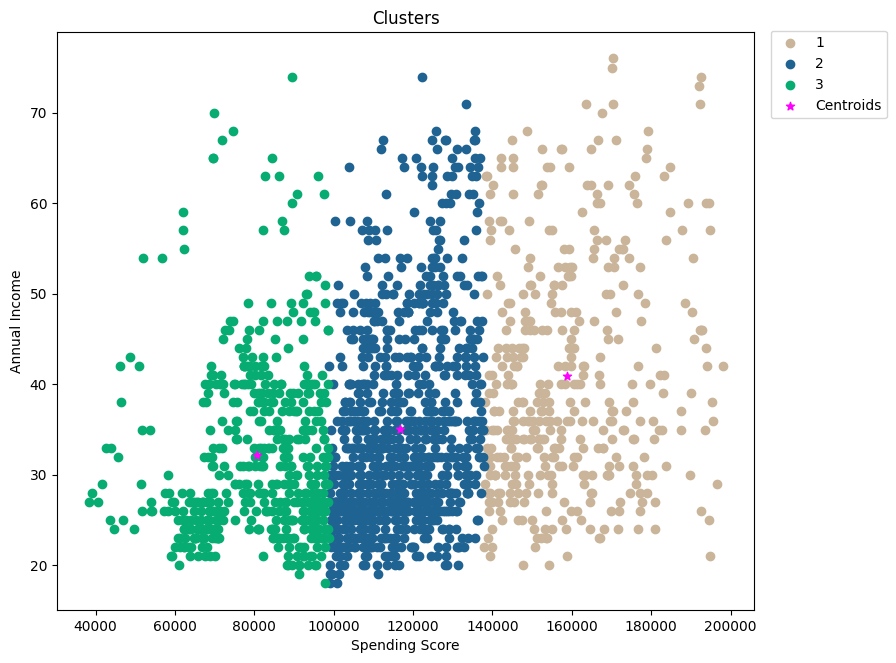

In [17]:
df1=  df_2[df_2.Group == 0]
df2=  df_2[df_2.Group == 1]
df3=  df_2[df_2.Group == 2]
plt.figure(figsize = (9,7.5))
plt.scatter(df1['Income'] , df1['Age']  , color = "#cab59a" , label = "1")
plt.scatter(df2['Income'] , df2['Age']  , color = "#1f6393" , label = "2")
plt.scatter(df3['Income'] , df3['Age'] , color = "#06ac72" , label = "3")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()

## However there is another way to cluster our data 

In [18]:
# sns.pairplot(df)

In [19]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [20]:
pca = PCA(n_components =2)
df = pca.fit_transform(df)

In [21]:
df[:,0]

array([ 2.64275134,  0.63983139, -0.65114423, ..., -1.38853352,
       -2.21873235, -1.86358353])

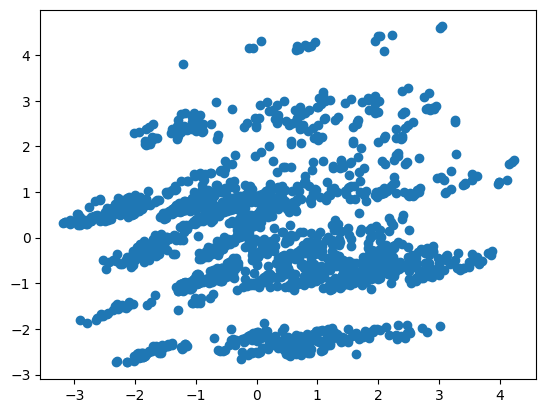

In [22]:
plt.scatter(df[:,0] , df[:,1])

In [23]:
WCSS = []
silhouette=[]
clusters = range(1,9)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(df)
    WCSS.append(model.inertia_)
    label = model.predict(df)
    if (i > 1):
        silhouette.append(silhouette_score(df,label))

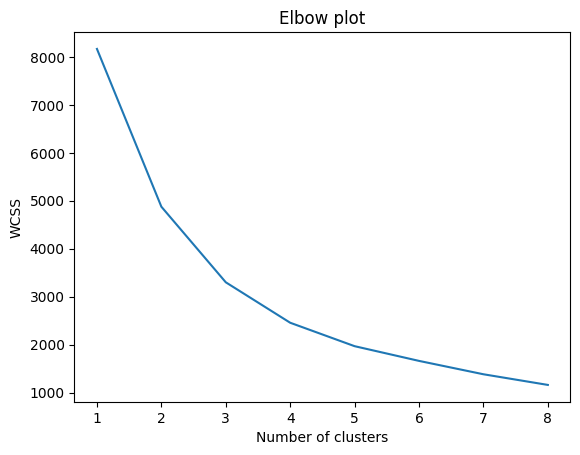

In [24]:
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow plot")
plt.plot(clusters , WCSS)

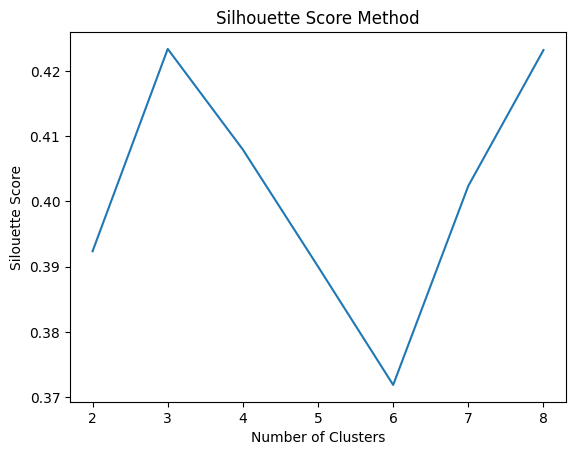

In [25]:
plt.plot(range(2,9),silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Silouette Score")
plt.title("Silhouette Score Method")
plt.show()

### 3 clusters is going to be the most optimum number of clusters

In [26]:
model = KMeans(n_clusters = 3 , init='k-means++' , n_init=100)
y_predicted  = model.fit_predict(df)

In [27]:
df = pd.DataFrame(df)

In [28]:
df["Group"] = y_predicted

In [29]:
df

,0,1,Group
0,2.642751,1.052772,1
1,0.639831,0.635226,1
2,-0.651144,-0.655167,2
3,2.084407,-0.395995,0
4,1.898876,-0.277273,0
...,...,...,...
1912,-0.758289,0.340792,2
1913,-0.990656,0.749314,2
1914,-1.388534,-2.305881,2
1915,-2.218732,0.534524,2


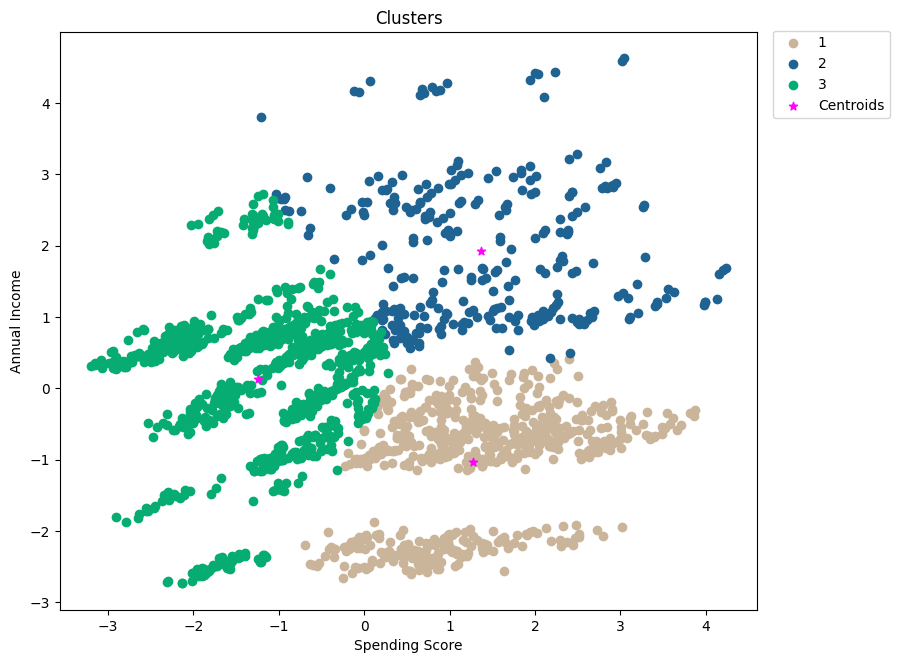

In [30]:
df1=  df[df.Group == 0]
df2=  df[df.Group == 1]
df3=  df[df.Group == 2]
plt.figure(figsize = (9,7.5))
plt.scatter(df1[0] , df1[1]  , color = "#cab59a" , label = "1")
plt.scatter(df2[0] , df2[1]  , color = "#1f6393" , label = "2")
plt.scatter(df3[0] , df3[1] , color = "#06ac72" , label = "3")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()